In [2]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
import csv
import pylab
from scipy.interpolate import interp1d


np.set_printoptions(threshold=sys.maxsize)



begin_surroundings = 198
end_surroundings = 199

#begin_earthquake = 6259313254
begin_earthquake = 6259295000
end_earthquake =   6259320000


In [3]:
time_list_1stOrderODE = []
dt_array_1stOrderODE = []
V_array_1stOrderODE = []
rhs_count_array_1stOrderODE = []
error_abs_psi_1stOrderODE = []
error_abs_S_1stOrderODE = []
error_rel_psi_1stOrderODE = []
error_rel_S_1stOrderODE = []
max_S_1stOrderODE = []
min_S_1stOrderODE = []
max_PSI_1stOrderODE = []
min_PSI_1stOrderODE = []
time_old = 0.0

#don't plot first two components
first = 1
second = 1

with open('../results/timeAnalysis_RKDP5.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if second:
            second = 0
        if first:
            first = 0
            second = 1
        else:
            time = row['time']
            dt = float(time) - time_old
            time_old = float(time)
            time_list_1stOrderODE.append(time)
            dt_array_1stOrderODE.append(dt)

            V_array_1stOrderODE.append(row['Vmax'])
            rhs_count_array_1stOrderODE.append(row['count_rhs'])
            error_abs_psi_1stOrderODE.append(row['errorPSIabs'])
            error_abs_S_1stOrderODE.append(row['errorSabs'])
            error_rel_psi_1stOrderODE.append(row['errorPSIrel'])
            error_rel_S_1stOrderODE.append(row['errorSrel'])
            max_S_1stOrderODE.append(row['maxS'])
            min_S_1stOrderODE.append(row['minS'])
            max_PSI_1stOrderODE.append(row['maxPSI'])
            min_PSI_1stOrderODE.append(row['minPSI'])

time_array_1stOrderODE = np.asarray(time_list_1stOrderODE, dtype=np.float64)
dt_array_1stOrderODE = np.asarray(dt_array_1stOrderODE, dtype=np.float64)
V_array_1stOrderODE = np.asarray(V_array_1stOrderODE, dtype=np.float64)
rhs_count_array_1stOrderODE = np.asarray(rhs_count_array_1stOrderODE, dtype=np.float64)
error_abs_psi_1stOrderODE = np.asarray(error_abs_psi_1stOrderODE, dtype=np.float64)
error_abs_S_1stOrderODE = np.asarray(error_abs_S_1stOrderODE, dtype=np.float64)
error_rel_psi_1stOrderODE = np.asarray(error_rel_psi_1stOrderODE, dtype=np.float64)
error_rel_S_1stOrderODE = np.asarray(error_rel_S_1stOrderODE, dtype=np.float64)
max_S_1stOrderODE = np.asarray(max_S_1stOrderODE, dtype=np.float64)
min_S_1stOrderODE = np.asarray(min_S_1stOrderODE, dtype=np.float64)
max_PSI_1stOrderODE = np.asarray(max_PSI_1stOrderODE, dtype=np.float64)
min_PSI_1stOrderODE = np.asarray(min_PSI_1stOrderODE, dtype=np.float64)

time_years_1stOrderODE = time_array_1stOrderODE / (365.2425*24*3600)


In [4]:
time_list_2ndOrderODE = []
dt_array_2ndOrderODE = []
V_array_2ndOrderODE = []
rhs_count_array_2ndOrderODE = []
error_abs_psi_2ndOrderODE = []
error_abs_S_2ndOrderODE = []
error_rel_psi_2ndOrderODE = []
error_rel_S_2ndOrderODE = []
max_S_2ndOrderODE = []
min_S_2ndOrderODE = []
max_PSI_2ndOrderODE = []
min_PSI_2ndOrderODE = []
time_old = 0.0

#don't plot first two components
first = 1
second = 1

with open('../results/timeAnalysis_extODE_RKDP5.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if second:
            second = 0
        if first:
            first = 0
            second = 1
        else:
            time = row['time']
            dt = float(time) - time_old
            time_old = float(time)
            time_list_2ndOrderODE.append(time)
            dt_array_2ndOrderODE.append(dt)

            V_array_2ndOrderODE.append(row['Vmax'])
            rhs_count_array_2ndOrderODE.append(row['count_rhs'])
            error_abs_psi_2ndOrderODE.append(row['errorPSIabs'])
            error_abs_S_2ndOrderODE.append(row['errorSabs'])
            error_rel_psi_2ndOrderODE.append(row['errorPSIrel'])
            error_rel_S_2ndOrderODE.append(row['errorSrel'])
            max_S_2ndOrderODE.append(row['maxS'])
            min_S_2ndOrderODE.append(row['minS'])
            max_PSI_2ndOrderODE.append(row['maxPSI'])
            min_PSI_2ndOrderODE.append(row['minPSI'])

time_array_2ndOrderODE = np.asarray(time_list_2ndOrderODE, dtype=np.float64)
dt_array_2ndOrderODE = np.asarray(dt_array_2ndOrderODE, dtype=np.float64)
V_array_2ndOrderODE = np.asarray(V_array_2ndOrderODE, dtype=np.float64)
rhs_count_array_2ndOrderODE = np.asarray(rhs_count_array_2ndOrderODE, dtype=np.float64)
error_abs_psi_2ndOrderODE = np.asarray(error_abs_psi_2ndOrderODE, dtype=np.float64)
error_abs_S_2ndOrderODE = np.asarray(error_abs_S_2ndOrderODE, dtype=np.float64)
error_rel_psi_2ndOrderODE = np.asarray(error_rel_psi_2ndOrderODE, dtype=np.float64)
error_rel_S_2ndOrderODE = np.asarray(error_rel_S_2ndOrderODE, dtype=np.float64)
max_S_2ndOrderODE = np.asarray(max_S_2ndOrderODE, dtype=np.float64)
min_S_2ndOrderODE = np.asarray(min_S_2ndOrderODE, dtype=np.float64)
max_PSI_2ndOrderODE = np.asarray(max_PSI_2ndOrderODE, dtype=np.float64)
min_PSI_2ndOrderODE = np.asarray(min_PSI_2ndOrderODE, dtype=np.float64)

time_years_2ndOrderODE = time_array_2ndOrderODE / (365.2425*24*3600)


In [5]:
time_list_compactDAE = []
dt_array_compactDAE = []
V_array_compactDAE = []
rhs_count_array_compactDAE = []
error_abs_psi_compactDAE = []
error_abs_S_compactDAE = []
error_rel_psi_compactDAE = []
error_rel_S_compactDAE = []
max_S_compactDAE = []
min_S_compactDAE = []
max_PSI_compactDAE = []
min_PSI_compactDAE = []
time_old = 0.0

#don't plot first two components
first = 1
second = 1

with open('../results/timeAnalysis_compactDAE_BDF4.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if second:
            second = 0
        if first:
            first = 0
            second = 1
        else:
            time = row['time']
            dt = float(time) - time_old
            time_old = float(time)
            time_list_compactDAE.append(time)
            dt_array_compactDAE.append(dt)

            V_array_compactDAE.append(row['Vmax'])
            rhs_count_array_compactDAE.append(row['count_rhs'])
            error_abs_psi_compactDAE.append(row['errorPSIabs'])
            error_abs_S_compactDAE.append(row['errorSabs'])
            error_rel_psi_compactDAE.append(row['errorPSIrel'])
            error_rel_S_compactDAE.append(row['errorSrel'])
            max_S_compactDAE.append(row['maxS'])
            min_S_compactDAE.append(row['minS'])
            max_PSI_compactDAE.append(row['maxPSI'])
            min_PSI_compactDAE.append(row['minPSI'])

time_array_compactDAE = np.asarray(time_list_compactDAE, dtype=np.float64)
dt_array_compactDAE = np.asarray(dt_array_compactDAE, dtype=np.float64)
V_array_compactDAE = np.asarray(V_array_compactDAE, dtype=np.float64)
rhs_count_array_compactDAE = np.asarray(rhs_count_array_compactDAE, dtype=np.float64)
error_abs_psi_compactDAE = np.asarray(error_abs_psi_compactDAE, dtype=np.float64)
error_abs_S_compactDAE = np.asarray(error_abs_S_compactDAE, dtype=np.float64)
error_rel_psi_compactDAE = np.asarray(error_rel_psi_compactDAE, dtype=np.float64)
error_rel_S_compactDAE = np.asarray(error_rel_S_compactDAE, dtype=np.float64)
max_S_compactDAE = np.asarray(max_S_compactDAE, dtype=np.float64)
min_S_compactDAE = np.asarray(min_S_compactDAE, dtype=np.float64)
max_PSI_compactDAE = np.asarray(max_PSI_compactDAE, dtype=np.float64)
min_PSI_compactDAE = np.asarray(min_PSI_compactDAE, dtype=np.float64)

time_years_compactDAE = time_array_compactDAE / (365.2425*24*3600)


In [6]:
time_list_extendedDAE = []
dt_array_extendedDAE = []
V_array_extendedDAE = []
rhs_count_array_extendedDAE = []
error_abs_psi_extendedDAE = []
error_abs_S_extendedDAE = []
error_rel_psi_extendedDAE = []
error_rel_S_extendedDAE = []
max_S_extendedDAE = []
min_S_extendedDAE = []
max_PSI_extendedDAE = []
min_PSI_extendedDAE = []
time_old = 0.0

#don't plot first two components
first = 1
second = 1

with open('../results/timeAnalysis_extendedDAE_BDF4.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if second:
            second = 0
        if first:
            first = 0
            second = 1
        else:
            time = row['time']
            dt = float(time) - time_old
            time_old = float(time)
            time_list_extendedDAE.append(time)
            dt_array_extendedDAE.append(dt)

            V_array_extendedDAE.append(row['Vmax'])
            rhs_count_array_extendedDAE.append(row['count_rhs'])
            error_abs_psi_extendedDAE.append(row['errorPSIabs'])
            error_abs_S_extendedDAE.append(row['errorSabs'])
            error_rel_psi_extendedDAE.append(row['errorPSIrel'])
            error_rel_S_extendedDAE.append(row['errorSrel'])
            max_S_extendedDAE.append(row['maxS'])
            min_S_extendedDAE.append(row['minS'])
            max_PSI_extendedDAE.append(row['maxPSI'])
            min_PSI_extendedDAE.append(row['minPSI'])

time_array_extendedDAE = np.asarray(time_list_extendedDAE, dtype=np.float64)
dt_array_extendedDAE = np.asarray(dt_array_extendedDAE, dtype=np.float64)
V_array_extendedDAE = np.asarray(V_array_extendedDAE, dtype=np.float64)
rhs_count_array_extendedDAE = np.asarray(rhs_count_array_extendedDAE, dtype=np.float64)
error_abs_psi_extendedDAE = np.asarray(error_abs_psi_extendedDAE, dtype=np.float64)
error_abs_S_extendedDAE = np.asarray(error_abs_S_extendedDAE, dtype=np.float64)
error_rel_psi_extendedDAE = np.asarray(error_rel_psi_extendedDAE, dtype=np.float64)
error_rel_S_extendedDAE = np.asarray(error_rel_S_extendedDAE, dtype=np.float64)
max_S_extendedDAE = np.asarray(max_S_extendedDAE, dtype=np.float64)
min_S_extendedDAE = np.asarray(min_S_extendedDAE, dtype=np.float64)
max_PSI_extendedDAE = np.asarray(max_PSI_extendedDAE, dtype=np.float64)
min_PSI_extendedDAE = np.asarray(min_PSI_extendedDAE, dtype=np.float64)

time_years_extendedDAE = time_array_extendedDAE / (365.2425*24*3600)


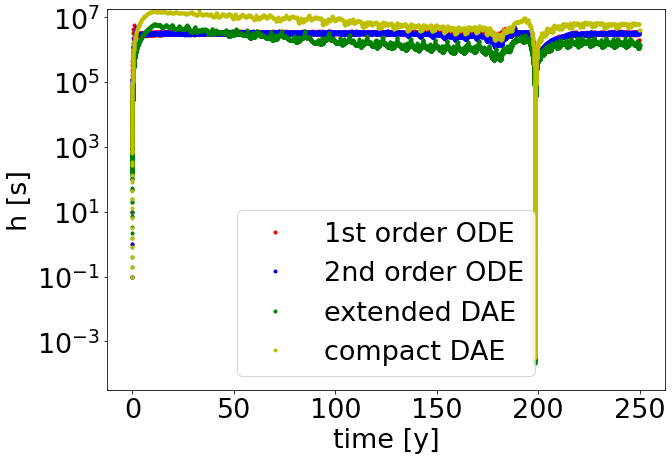

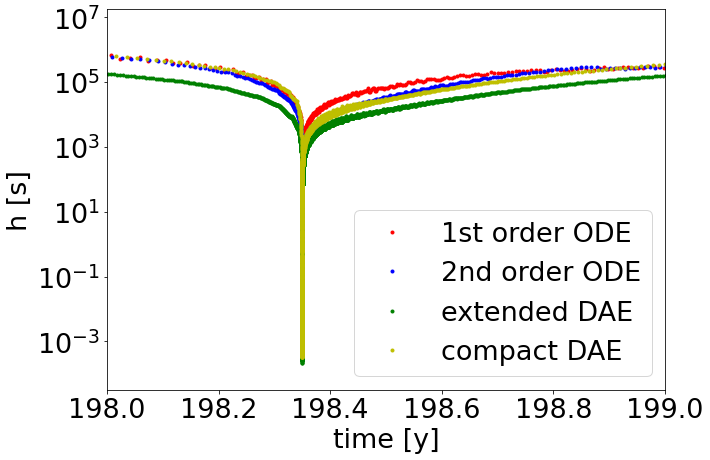

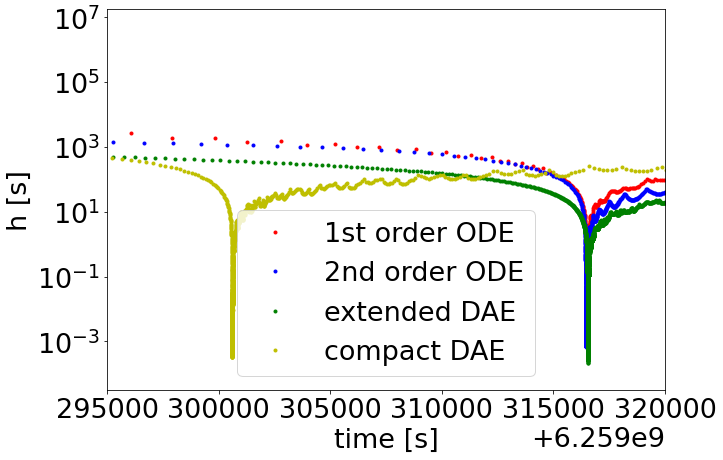

In [7]:
plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 27})

plt.plot(time_years_1stOrderODE, dt_array_1stOrderODE,'.r', label = "1st order ODE")
plt.plot(time_years_2ndOrderODE, dt_array_2ndOrderODE,'.b', label = "2nd order ODE")
plt.plot(time_years_extendedDAE, dt_array_extendedDAE,'.g', label = "extended DAE")
plt.plot(time_years_compactDAE, dt_array_compactDAE,'.y', label = "compact DAE")

plt.xlabel("time [y]")
plt.ylabel("h [s]")

plt.yscale('log')

plt.ylim(0.1*min(min(np.min(dt_array_1stOrderODE),np.min(dt_array_compactDAE)),
                 min(np.min(dt_array_1stOrderODE), np.min(dt_array_2ndOrderODE))), 
         1.1*max(max(np.max(dt_array_1stOrderODE),np.max(dt_array_compactDAE)),
                 max(np.max(dt_array_1stOrderODE), np.max(dt_array_2ndOrderODE))))

plt.legend()

plt.savefig('../results/TANDEMcompareFormulationstimeEvolutionDTall.png', format='png',dpi=300, bbox_inches='tight')

plt.show()




#surroundings
plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 27})

plt.plot(time_years_1stOrderODE, dt_array_1stOrderODE,'.r', label = "1st order ODE")
plt.plot(time_years_2ndOrderODE, dt_array_2ndOrderODE,'.b', label = "2nd order ODE")
plt.plot(time_years_extendedDAE, dt_array_extendedDAE,'.g', label = "extended DAE")
plt.plot(time_years_compactDAE, dt_array_compactDAE,'.y', label = "compact DAE")

plt.xlabel("time [y]")
plt.ylabel("h [s]")

plt.yscale('log')

plt.ylim(0.1*min(min(np.min(dt_array_1stOrderODE),np.min(dt_array_compactDAE)),
                 min(np.min(dt_array_1stOrderODE), np.min(dt_array_2ndOrderODE))), 
         1.1*max(max(np.max(dt_array_1stOrderODE),np.max(dt_array_compactDAE)),
                 max(np.max(dt_array_1stOrderODE), np.max(dt_array_2ndOrderODE))))

plt.xlim(begin_surroundings, end_surroundings)

plt.legend()

plt.savefig('../results/TANDEMcompareFormulationstimeEvolutionDTsurroundings.png', format='png',dpi=300, bbox_inches='tight')

plt.show()


#earthquake
plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 27})

plt.plot(time_array_1stOrderODE, dt_array_1stOrderODE,'.r', label = "1st order ODE")
plt.plot(time_array_2ndOrderODE, dt_array_2ndOrderODE,'.b', label = "2nd order ODE")
plt.plot(time_array_extendedDAE, dt_array_extendedDAE,'.g', label = "extended DAE")
plt.plot(time_array_compactDAE, dt_array_compactDAE,'.y', label = "compact DAE")

plt.xlabel("time [s]")
plt.ylabel("h [s]")

plt.ylim(0.1*min(min(np.min(dt_array_1stOrderODE),np.min(dt_array_compactDAE)),
                 min(np.min(dt_array_1stOrderODE), np.min(dt_array_2ndOrderODE))), 
         1.1*max(max(np.max(dt_array_1stOrderODE),np.max(dt_array_compactDAE)),
                 max(np.max(dt_array_1stOrderODE), np.max(dt_array_2ndOrderODE))))
plt.xlim(begin_earthquake, end_earthquake)

plt.yscale('log')

plt.legend()

plt.savefig('../results/TANDEMcompareFormulationstimeEvolutionDTearthquake.png', format='png',dpi=300, bbox_inches='tight')

plt.show()



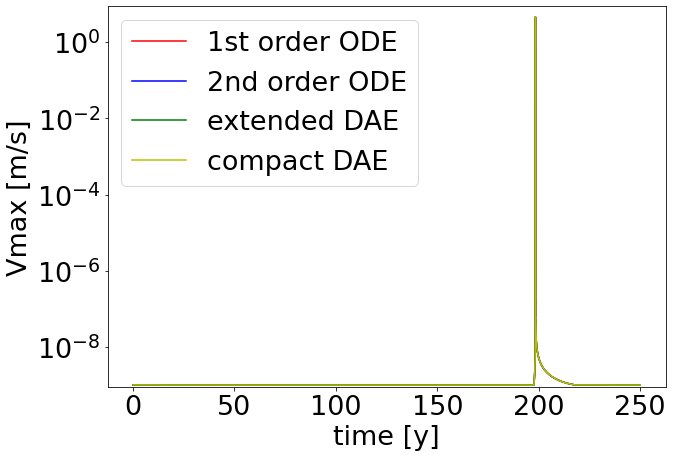

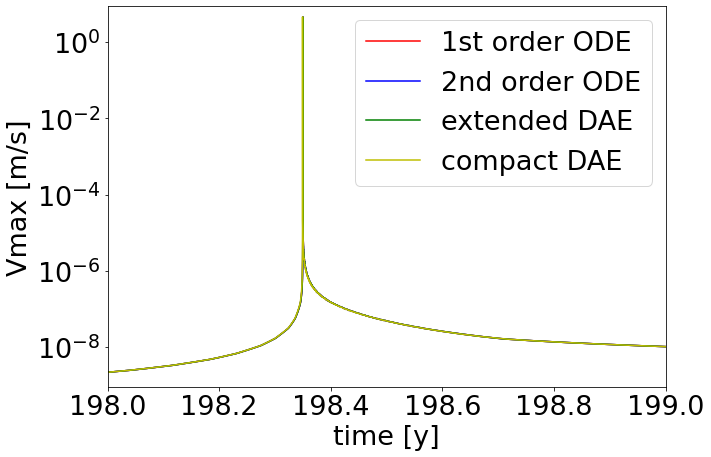

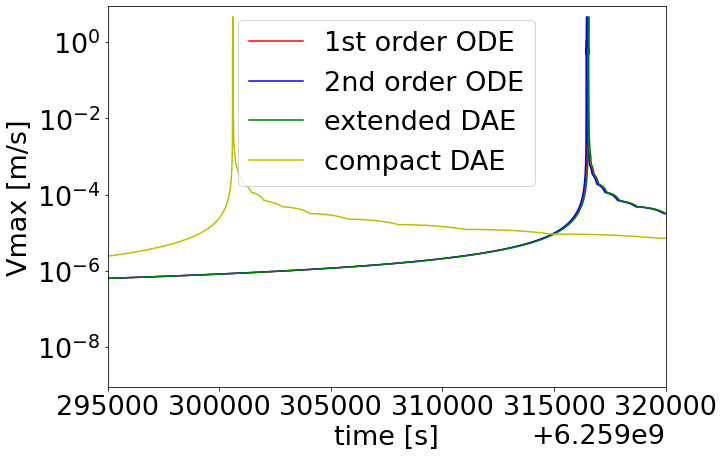

In [8]:
plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 27})

plt.plot(time_years_1stOrderODE, V_array_1stOrderODE,'-r', label = "1st order ODE")
plt.plot(time_years_2ndOrderODE, V_array_2ndOrderODE,'-b', label = "2nd order ODE")
plt.plot(time_years_extendedDAE, V_array_extendedDAE,'-g', label = "extended DAE")
plt.plot(time_years_compactDAE, V_array_compactDAE,'-y', label = "compact DAE")

plt.xlabel("time [y]")
plt.ylabel("Vmax [m/s]")

plt.yscale('log')

plt.ylim(0.9*min(min(np.min(V_array_1stOrderODE),np.min(V_array_compactDAE)),
                 min(np.min(V_array_1stOrderODE), np.min(V_array_2ndOrderODE))), 
         1.9*max(max(np.max(V_array_1stOrderODE),np.max(V_array_compactDAE)),
                 max(np.max(V_array_1stOrderODE), np.max(V_array_2ndOrderODE))))

plt.legend()

plt.savefig('../results/TANDEMcompareFormulationstimeEvolutionVall.png', format='png',dpi=300, bbox_inches='tight')

plt.show()




#surroundings
plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 27})

plt.plot(time_years_1stOrderODE, V_array_1stOrderODE,'-r', label = "1st order ODE")
plt.plot(time_years_2ndOrderODE, V_array_2ndOrderODE,'-b', label = "2nd order ODE")
plt.plot(time_years_extendedDAE, V_array_extendedDAE,'-g', label = "extended DAE")
plt.plot(time_years_compactDAE, V_array_compactDAE,'-y', label = "compact DAE")

plt.xlabel("time [y]")
plt.ylabel("Vmax [m/s]")

plt.yscale('log')

plt.ylim(0.9*min(min(np.min(V_array_1stOrderODE),np.min(V_array_compactDAE)),
                 min(np.min(V_array_1stOrderODE), np.min(V_array_2ndOrderODE))), 
         1.9*max(max(np.max(V_array_1stOrderODE),np.max(V_array_compactDAE)),
                 max(np.max(V_array_1stOrderODE), np.max(V_array_2ndOrderODE))))
plt.xlim(begin_surroundings, end_surroundings)

plt.legend()

plt.savefig('../results/TANDEMcompareFormulationstimeEvolutionVsurroundings.png', format='png',dpi=300, bbox_inches='tight')

plt.show()



#earthquake
plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 27})


plt.plot(time_array_1stOrderODE, V_array_1stOrderODE,'-r', label = "1st order ODE")
plt.plot(time_array_2ndOrderODE, V_array_2ndOrderODE,'-b', label = "2nd order ODE")
plt.plot(time_array_extendedDAE, V_array_extendedDAE,'-g', label = "extended DAE")
plt.plot(time_array_compactDAE, V_array_compactDAE,'-y', label = "compact DAE")

plt.xlabel("time [s]")
plt.ylabel("Vmax [m/s]")

plt.yscale('log')

plt.ylim(0.9*min(min(np.min(V_array_1stOrderODE),np.min(V_array_compactDAE)),
                 min(np.min(V_array_1stOrderODE), np.min(V_array_2ndOrderODE))), 
         1.9*max(max(np.max(V_array_1stOrderODE),np.max(V_array_compactDAE)),
                 max(np.max(V_array_1stOrderODE), np.max(V_array_2ndOrderODE))))
plt.xlim(begin_earthquake, end_earthquake)

plt.legend()

plt.savefig('../results/TANDEMcompareFormulationstimeEvolutionVearthquake.png', format='png',dpi=300, bbox_inches='tight')

plt.show()



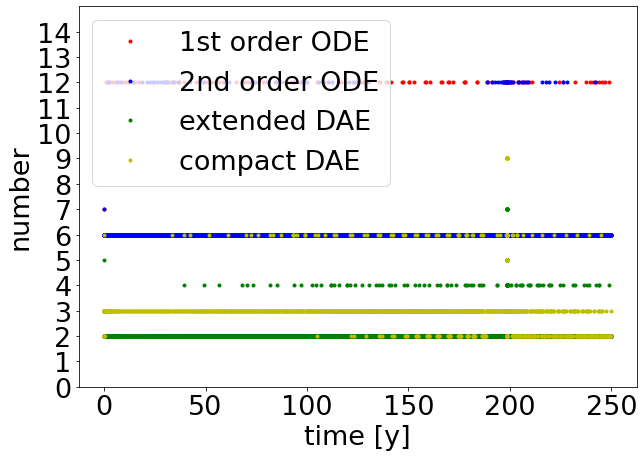

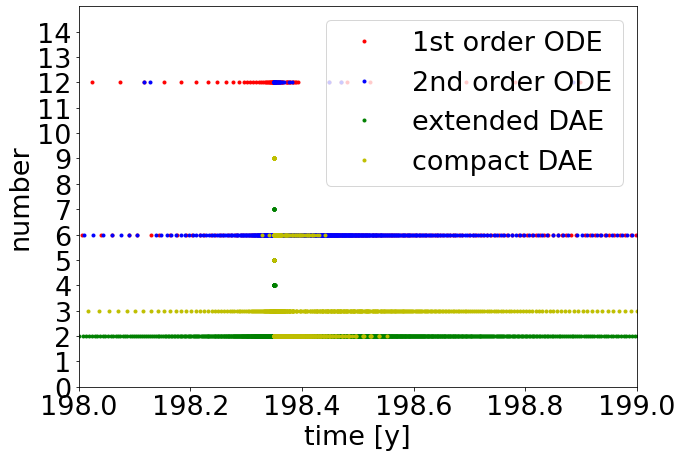

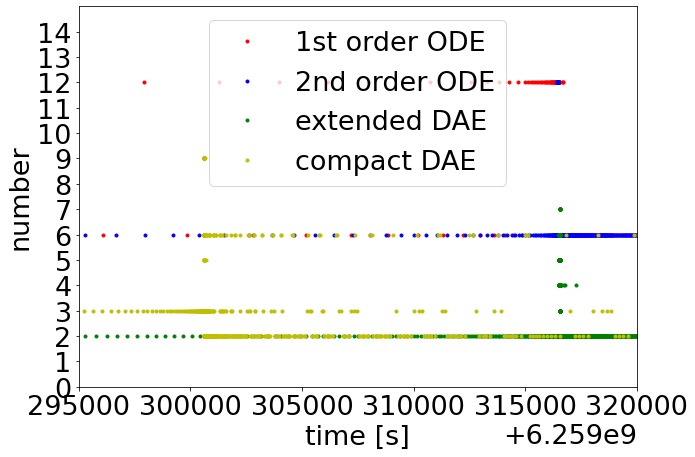

In [9]:
plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 27})

plt.plot(time_years_1stOrderODE, rhs_count_array_1stOrderODE,'.r', label = "1st order ODE")
plt.plot(time_years_2ndOrderODE, rhs_count_array_2ndOrderODE,'.b', label = "2nd order ODE")
plt.plot(time_years_extendedDAE, rhs_count_array_extendedDAE,'.g', label = "extended DAE")
plt.plot(time_years_compactDAE, rhs_count_array_compactDAE,'.y', label = "compact DAE")

plt.xlabel("time [y]")
plt.ylabel("number")

plt.ylim(0, 15)
yint = range(0, 15)
plt.yticks(yint)
#plt.ylim(0, max(max(np.max(rhs_count_array_1stOrderODE),np.max(rhs_count_array_compactDAE)), 
#                max(np.max(rhs_count_array_1stOrderODE), np.max(rhs_count_array_2ndOrderODE)))+6)

plt.legend()

plt.savefig('../results/TANDEMcompareFormulationstimeEvolutionRHSall.png', format='png',dpi=300, bbox_inches='tight')

plt.show()



#surroundings
plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 27})

plt.plot(time_years_1stOrderODE, rhs_count_array_1stOrderODE,'.r', label = "1st order ODE")
plt.plot(time_years_2ndOrderODE, rhs_count_array_2ndOrderODE,'.b', label = "2nd order ODE")
plt.plot(time_years_extendedDAE, rhs_count_array_extendedDAE,'.g', label = "extended DAE")
plt.plot(time_years_compactDAE, rhs_count_array_compactDAE,'.y', label = "compact DAE")

plt.xlabel("time [y]")
plt.ylabel("number")

plt.ylim(0, 15)
yint = range(0, 15)
plt.yticks(yint)
#plt.ylim(0, max(max(np.max(rhs_count_array_1stOrderODE),np.max(rhs_count_array_compactDAE)), 
#                max(np.max(rhs_count_array_1stOrderODE), np.max(rhs_count_array_2ndOrderODE)))+6)

plt.xlim(begin_surroundings, end_surroundings)

plt.legend()

plt.savefig('../results/TANDEMcompareFormulationstimeEvolutionRHSsurroundings.png', format='png',dpi=300, bbox_inches='tight')

plt.show()



#earthquake
plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 27})


plt.plot(time_array_1stOrderODE, rhs_count_array_1stOrderODE,'.r', label = "1st order ODE")
plt.plot(time_array_2ndOrderODE, rhs_count_array_2ndOrderODE,'.b', label = "2nd order ODE")
plt.plot(time_array_extendedDAE, rhs_count_array_extendedDAE,'.g', label = "extended DAE")
plt.plot(time_array_compactDAE, rhs_count_array_compactDAE,'.y', label = "compact DAE")

plt.xlabel("time [s]")
plt.ylabel("number")

plt.ylim(0, 15)
yint = range(0, 15)
plt.yticks(yint)
#plt.ylim(0, max(max(np.max(rhs_count_array_1stOrderODE),np.max(rhs_count_array_compactDAE)), 
#                max(np.max(rhs_count_array_1stOrderODE), np.max(rhs_count_array_2ndOrderODE)))+6)

plt.xlim(begin_earthquake, end_earthquake)

plt.legend()

plt.savefig('../results/TANDEMcompareFormulationstimeEvolutionRHSearthquake.png', format='png',dpi=300, bbox_inches='tight')

plt.show()